# 🍷 Wine Quality Detection using Machine Learning

This notebook explores different machine learning approaches to predict wine quality based on physicochemical properties from the UCI Wine Quality dataset.

## Overview

**Models compared:**
- **Support Vector Machine (SVM)** — Hard Margin vs Soft Margin
- **XGBoost Classifier**

**Evaluation metrics:**
- Accuracy, F1-score, ROC-AUC, and ROC Curves

## Notebook Structure

1. **Setup** — Imports and dependencies  
2. **Data Loading** — Load and merge red/white wine datasets  
3. **EDA** — Exploratory data analysis and visualizations  
4. **Preprocessing** — Binary classification, train/test split, scaling  
5. **Model Training** — SVM (Hard & Soft) and XGBoost  
6. **Evaluation** — Compare model performance  


## 1. Setup

In [35]:
# Step 1: Import Required Libraries

# Data manipulation and numerical operations
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models: SVM for classification
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

# XGBoost classifier (install via: pip install xgboost)
from xgboost import XGBClassifier




In [3]:

#  Install XGBoost 
!pip install xgboost

---

##  Load and Merge the Datasets

The Wine Quality dataset contains physicochemical properties of red and white wine samples. We load both files and merge them for unified modeling.


### Dataset Loading 
We load the Wine Quality dataset and inspect its basic structure.


In [4]:
# Load red and white wine datasets (UCI Wine Quality dataset)
# Note: CSV uses semicolon (;) as delimiter
red_wine = pd.read_csv('../data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('../data/winequality-white.csv', sep=';')

# Inspect dataset dimensions
print("Red wine shape:", red_wine.shape)
print("White wine shape:", white_wine.shape)

Red wine shape: (1599, 12)
White wine shape: (4898, 12)


In [5]:
# Verify both datasets have identical column structure (required for merging)
print("Red wine columns:", red_wine.columns.tolist())
print("White wine columns:", white_wine.columns.tolist())

Red wine columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
White wine columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


### Wine Type Encoding

A new feature is added to distinguish between red and white wines.


In [6]:
# Encode wine type: Red=1, White=0 (binary feature for model)
red_wine['type'] = 1   # Red wine
white_wine['type'] = 0  # White wine

### Dataset Merging

Both datasets are merged into a single dataset to allow unified modeling and comparison.


In [7]:
# Merge red and white wine into a single dataset for unified modeling
wine_data = pd.concat([red_wine, white_wine], axis=0).reset_index(drop=True)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [8]:
#  Data Quality Check - Missing Values
# Verify no missing values (important for ML models)
print("Missing values in dataset:")
print(wine_data.isnull().sum())
print("\nDataset shape before preprocessing:", wine_data.shape)

Missing values in dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Dataset shape before preprocessing: (6497, 13)


## Exploratory Data Analysis (EDA)

This section explores the statistical properties of the dataset to guide preprocessing and modeling decisions.


#### overview 

In [9]:
# Quick check: merged dataset dimensions
wine_data.shape

(6497, 13)

In [10]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [11]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


### Distribution of Wine Quality


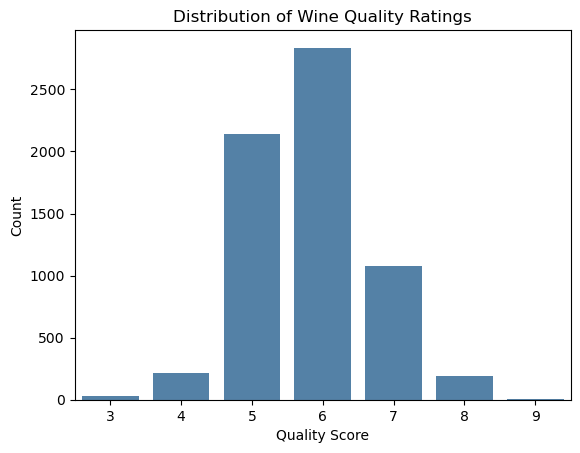

In [12]:
# Distribution of quality ratings (0-10 scale)
sns.countplot(x='quality', data=wine_data, color='steelblue')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

The dataset is imbalanced and heavily centered around medium quality values.

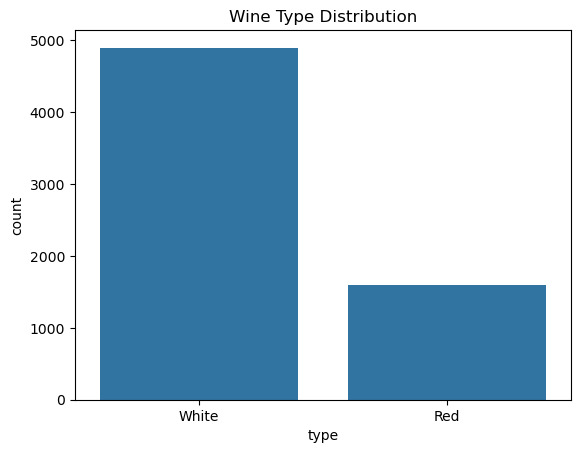

In [13]:
# Red vs White Wine Quality Distribution
sns.countplot(x='type', data=wine_data)
plt.xticks([0, 1], ['White', 'Red'])
plt.title("Wine Type Distribution")
plt.show()

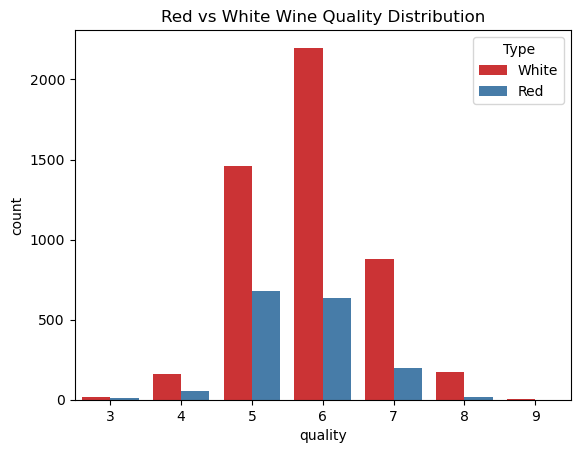

In [14]:
# Red vs White Wine Quality Distribution
sns.countplot(x='quality', hue='type', data=wine_data, palette='Set1')
plt.title('Red vs White Wine Quality Distribution')
plt.legend(title='Type', labels=['White', 'Red'])
plt.show()

### Outliers 

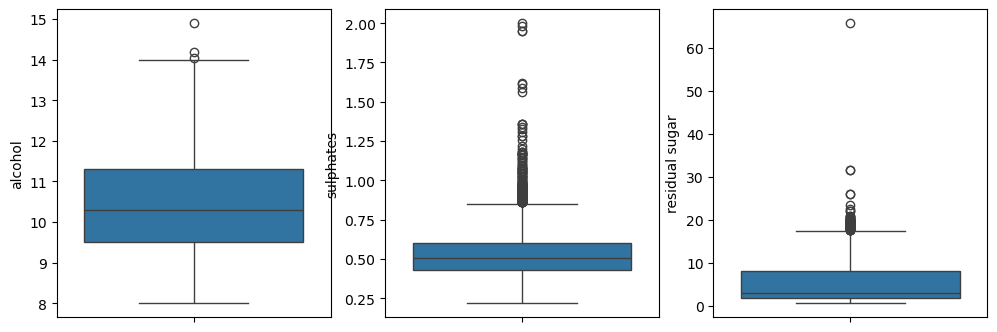

In [15]:
plt.figure(figsize=(12,4))

# Box plots for selected features
plt.subplot(1,3,1)
sns.boxplot(y=wine_data['alcohol'])

plt.subplot(1,3,2)
sns.boxplot(y=wine_data['sulphates'])

plt.subplot(1,3,3)
sns.boxplot(y=wine_data['residual sugar'])

plt.show()

There are outliers in the dataset, but removing them may not be appropriate—
they could represent valid chemical properties of certain wine samples.

### Correlation 

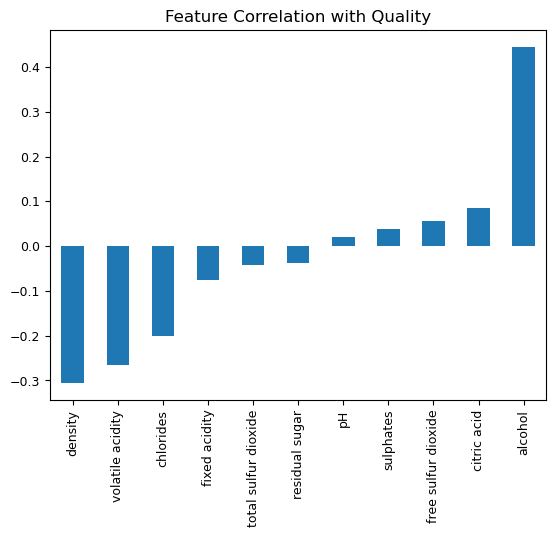

In [16]:
# Correlation of each feature with quality (excluding 'type' and 'quality')
wine_data.corr()['quality'].drop(['quality', 'type'], errors='ignore').sort_values().plot(kind='bar', fontsize=9)
plt.title('Feature Correlation with Quality')
plt.show()

Alcohol has the highest positive **correlation** with quality.

---

##  Data Preprocessing

Before modeling, we:
1. Convert quality to binary (Good ≥6, Not Good <6)
2. Remove rare quality classes (3 and 9)
3. Split features and target
4. Train/test split (80/20)
5. Standardize features (critical for SVM)

###  Convert quality to binary (Good ≥6, Not Good <6) 

In [18]:
wine_data['quality_label'] = wine_data['quality'].apply(
    lambda x: 1 if x >= 6 else 0
)


print("Quality binary distribution:")
print(wine_data['quality_label'].value_counts())

print(f"\nClass balance ratio (Good/Not Good): {wine_data['quality_label'].value_counts()[1] / wine_data['quality_label'].value_counts()[0]:.2f}")

Quality binary distribution:
quality_label
1    4113
0    2384
Name: count, dtype: int64

Class balance ratio (Good/Not Good): 1.73


### Remove rare quality classes (3 and 9) 

In [19]:
# Original quality distribution (0-10 scale) check
wine_data['quality'].value_counts().sort_index()


quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

The dataset is imbalanced and heavily centered around medium quality values.
- Quality 3 and 9 are **rare** and will be removed in preprocessing.
- Most samples are concentrated at quality 5 and 6.

In [20]:
# Remove rare quality classes (3 and 9)
wine_data = wine_data[(wine_data['quality'] >= 4) & (wine_data['quality'] <= 8)]
print("Dataset shape after removing rare classes:", wine_data.shape)
print("Quality value counts after filtering:")
print(wine_data['quality'].value_counts().sort_index())

Dataset shape after removing rare classes: (6462, 14)
Quality value counts after filtering:
quality
4     216
5    2138
6    2836
7    1079
8     193
Name: count, dtype: int64


### Split features and target 
Prepare features (X) and target (y) for model training.

In [21]:
 #Separate features and target
X = wine_data.drop(['quality', 'quality_label', 'type'], axis=1)
y = wine_data['quality_label']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {X.columns.tolist()}")

Features shape: (6462, 11)
Target shape: (6462,)

Feature columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


### Train/test split (80/20) 

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [23]:

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print("----------------------------")
print(f"\nTesting set class distribution:")
print(y_test.value_counts())

Training set size: 5169
Testing set size: 1293

Training set class distribution:
quality_label
1    3286
0    1883
Name: count, dtype: int64
----------------------------

Testing set class distribution:
quality_label
1    822
0    471
Name: count, dtype: int64


### Standardize features

Standardize features using StandardScaler. This is **critical for SVM** as the algorithm is sensitive to feature scaling.

In [25]:
# Standardize features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


--- 

## Models Training  and Evaluation

We will train two SVM variants: Hard Margin and Soft Margin  & XGBoost  
This comparison helps understand how margin violation tolerance affects performance.

### 1.  Hard Margin Support Vector Machine (SVM)

The Hard Margin SVM enforces a strict separation between classes by allowing no margin violations.
This model assumes that the data is perfectly linearly separable, which is rarely the case in real-world datasets.


In [26]:
 
# Train Hard Margin SVM
hard_margin_svm = SVC(kernel="linear",
                      C=100,
                      probability=True,
                      random_state=42)

hard_margin_svm.fit(X_train_scaled, y_train)


SVC(C=100, kernel='linear', probability=True, random_state=42)

In [27]:
# Predictions and evaluation for Hard Margin SVM
y_pred_hard = hard_margin_svm.predict(X_test_scaled)
# Use TEST data for ROC; get probability of positive class (column 1)
y_prob_hard = hard_margin_svm.predict_proba(X_test_scaled)[:, 1]

print("✅ Hard Margin SVM training completed.")



✅ Hard Margin SVM training completed.


### 2.  Soft Margin SVM

Soft Margin SVM (C=1.0) allows for margin violations, balancing model complexity and training accuracy.
More suitable for real-world data with noise.

In [28]:
# Train Soft Margin SVM (C=1.0)
# probability=True needed for predict_proba (e.g. ROC curves)
soft_margin_svm =  SVC(
     kernel='rbf',
       C=1.0,
         gamma='scale',
           probability=True,
             random_state=42)
soft_margin_svm.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [29]:
# Predictions
y_pred_soft = soft_margin_svm.predict(X_test_scaled)
y_pred_soft_proba = soft_margin_svm.predict_proba(X_test_scaled)[:, 1]

print("✅ Soft Margin SVM training completed.")

✅ Soft Margin SVM training completed.


### 3. XGBoost

In [31]:
# XGBoost: tree-based, works with unscaled data (X_train, X_test)
xgb = XGBClassifier(
    n_estimators=100,
      learning_rate=0.1,
        max_depth=5, 
        random_state=42, 
        use_label_encoder = False, 
        eval_metric = 'logloss')

# train the model with original data 
xgb.fit(X_train, y_train)



c:\Users\pc home\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:10:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [32]:
y_pred_xgb = xgb.fit(X_train, y_train).predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]  

print("✅ XGBoost training completed.")

✅ XGBoost training completed.


c:\Users\pc home\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:11:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


---------------------------------------------------------------

## evaluation Metrics:


<Figure size 600x400 with 0 Axes>

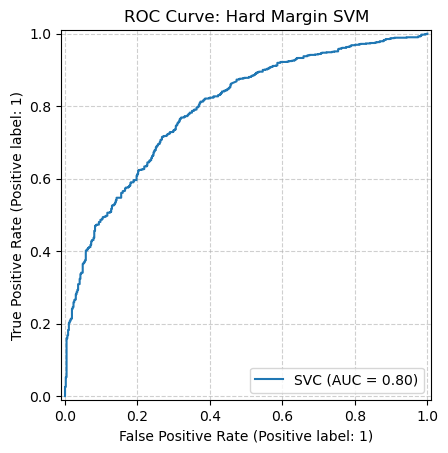

<Figure size 600x400 with 0 Axes>

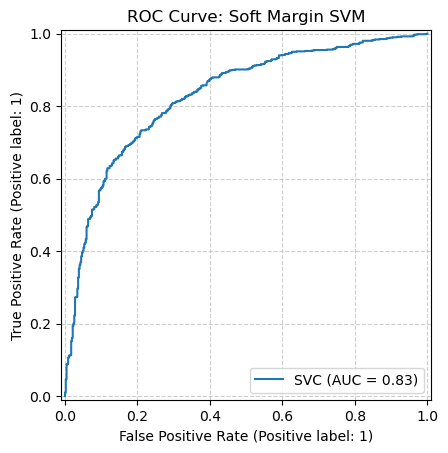

<Figure size 600x400 with 0 Axes>

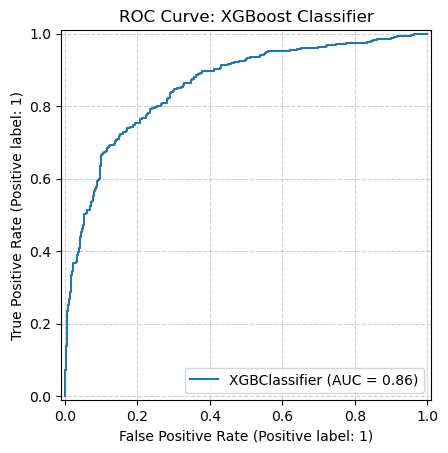


--- Final Evaluation Metrics ---


,Model,Accuracy,F1-Score,ROC/AUC
0,Hard Margin SVM,0.740913,0.807139,0.795353
1,Soft Margin SVM,0.767981,0.824561,0.831337
2,XGBoost Classifier,0.791957,0.840356,0.858310


In [37]:
from sklearn.metrics import RocCurveDisplay, accuracy_score, f1_score, roc_auc_score
# 1. model defintions and dara 

model_list = [
    {"name": "Hard Margin SVM", "model": hard_margin_svm, "X_eval": X_test_scaled},
    {"name": "Soft Margin SVM", "model": soft_margin_svm, "X_eval": X_test_scaled},
    {"name": "XGBoost Classifier", "model": xgb, "X_eval": X_test}
]

# 2. matrics storage for table
evaluation_results = []

# 3. Loop through models, predict, evaluate, and plot ROC curves
for item in model_list:
    name = item["name"]
    model = item["model"]
    X_eval = item["X_eval"]
    
    # predict and probabilities for ROC/AUC
    preds = model.predict(X_eval)
    probs = model.predict_proba(X_eval)[:, 1]
    
    # calculate metrics
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds) # Binary F1
    auc = roc_auc_score(y_test, probs)
    
    # storing results for final table
    evaluation_results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-Score": f1,
        "ROC/AUC": auc
    })
    
    # graphical ROC curves using sklearn's built-in function
    plt.figure(figsize=(6, 4))
    RocCurveDisplay.from_estimator(model, X_eval, y_test)
    plt.title(f"ROC Curve: {name}")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# 4. summarize results in a DataFrame for clear comparison
final_df = pd.DataFrame(evaluation_results)
print("\n--- Final Evaluation Metrics ---")
display(final_df)


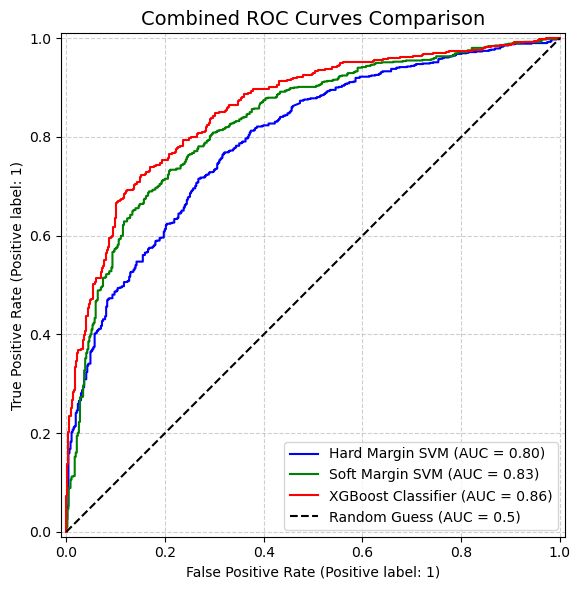

In [ ]:
# combine all ROC curves in one plot for direct visual comparison
fig, ax = plt.subplots(figsize=(8, 6))

model_info = [
    {"name": "Hard Margin SVM", "model": hard_margin_svm, "X": X_test_scaled, "color": "blue"},
    {"name": "Soft Margin SVM", "model": soft_margin_svm, "X": X_test_scaled, "color": "green"},
    {"name": "XGBoost Classifier", "model": xgb, "X": X_test, "color": "red"}
] 
for item in model_info:
    RocCurveDisplay.from_estimator(
        item["model"], 
        item["X"], 
        y_test, 
        ax=ax, 
        name=item["name"],  
        color=item["color"]
    )

ax.set_title("Combined ROC Curves Comparison", fontsize=14)
ax.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.5)") # خط المرجع
ax.legend(loc="lower right")
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()